### **Additive Color Model Operation for 3 colors**
(2019.09.24. 07:15)

#### 1. import libraries, and set 3 colors

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

c1 = 'darkred'
c2 = 'teal'     # matplotlib defined color names
c3 = '#0000FF'    # 'blue'

c1 = np.array(mpl.colors.to_rgb(c1))
c2 = np.array(mpl.colors.to_rgb(c2))
c3 = np.array(mpl.colors.to_rgb(c3))

print(c1, c2, c3)

[0.54509804 0.         0.        ] [0.         0.50196078 0.50196078] [0. 0. 1.]


#### 2. function definition

In [33]:
def add_color(c1, c2, c3, ipol=0):
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    c3=np.array(mpl.colors.to_rgb(c3))
    
    #brightness
    def br(color):
        brightness = 0.21*color[0] + 0.72*color[1] + 0.07*color[2]
        return brightness
    
#     print(brightness(c1), brightness(c2), brightness(c3))
    
    if ipol < 0.5:
        # if c1 and c2 are parallel
        if np.dot(c1, c2) == np.linalg.norm(c1) * np.linalg.norm(c2):
            c = 2*((0.5-ipol)*c1 + ipol*c2)
        else:
            if ipol < 0.25:
                c = c1 + 4*ipol * c2
            elif ipol < 0.5:
                c = (2 - 4*ipol) * c1 + c2
        # brightness calibration
        b1 = br(c1)
        b2 = br(c2)
        b = 2*((0.5-ipol)*b1 + ipol*b2)
        
    else:
        # if c2 and c3 are parallel
        if np.dot(c2, c3) == np.linalg.norm(c2) * np.linalg.norm(c3):
            c = 2*((1-ipol)*c2 + (ipol-0.5)*c3)
        else:
            if ipol < 0.75:
                c = c2 + (4*ipol-2) * c3
            else:
                c = (4 - 4*ipol) * c2 + c3
        # brightness calibration
        b2 = br(c2)
        b3 = br(c3)
        b = 2*((1-ipol)*b2 + (ipol-0.5)*b3)
    
    c = c/br(c) * b
    if c.max() > 1:
        c = c/c.max()
        
    return mpl.colors.to_hex(c)

#### 3. visualize

#0000ff
#808080
#ffff00
#ff8000
#ff0000


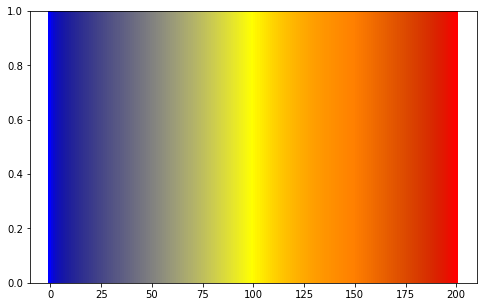

In [34]:
%matplotlib inline

c1 = 'blue'
c2 = 'yellow'
c3 = 'red'

n = 200
fig, ax = plt.subplots(figsize=(8, 5))
for x in range(n+1):
    color = add_color(c1,c2,c3, x/n)
    if x in [0, 50, 100, 150, 200]:
        print(color)
    ax.axvline(x, color=color, linewidth=4) 
plt.show()